In [140]:
import pandas as pd
import requests
from tqdm import tqdm
import time
import plotly.express as px

# NYT

The following is a dataframe collected from calling the NYT Article Metadata API for each month (the data is recorded monthly) in the years 2020-2024. Of note, the NYT API is free, but is limited at 500 calls a day, and each call is ideally separated with 12 seconds. This is still a lot of articles, as each call refers to a pairing of a year and a month, but it will take time to build a larger dataset spanning multiple decades. (500 calls is about 41 sets of year/month.)

There doesn't seem to be a way to filter the relevant articles during the query, so these are filtered by the [Business section](https://www.nytimes.com/section/business) (or news desk, as the writers of the section) of NYT. There is a "Financial" news desk, but I was unable to retrieve any articles from it (I suppose it may not have articles). Within Business, there appear to be many subsections -- these can be filtered down later, but I was not sure which ones to keep, and there are many which do not have a labeled subsection).

As far as analysis, as these articles do have a dedicated publication time, they can be matched to historical data, or run through a language model for sentiment classification. *Of additional note, the later API used in this notebook includes a sentiment score, but if time allows, or low difficulty, I think it may be good to at least run a validation classification, because we don't know how those sentiment scores were calculated.*

In [ ]:
years = ['2020','2021','2022','2023','2024']
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
nyt = []
key = ''

In [225]:
for year in tqdm(years):
    for month in tqdm(months):
        url = f'https://api.nytimes.com/svc/archive/v1/{year}/{month}.json'
        params = {
            'api-key':key
        }
        r = requests.get(url, params=params)
        if r.status_code == 200: 
            articles = r.json().get("response", {}).get("docs", [])
            nyt.extend([a for a in articles if a.get("news_desk") == "Business"])
            
        time.sleep(12)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [07:45<00:00, 93.18s/it]


In [228]:
nyt_df = pd.json_normalize(nyt)

In [234]:
nyt_df.subsection_name.unique()

array([nan, 'Personal Tech', 'Economy', 'DealBook', 'Media',
       'Energy & Environment ', 'Asia Pacific', 'Politics', 'Retirement',
       'Entrepreneurship', 'Television', 'International Business',
       'Europe', 'Africa', 'Americas', 'Paying for College', 'Music',
       'Health Insurance', 'Mind', 'Australia', 'Small Business',
       'Middle East', 'Mutual Funds', 'Olympics', 'Canada'], dtype=object)

In [235]:
nyt_df.iloc[0,0]

'Sales doubled in 2019, but the industry’s tipping point — severing ties to the gas pump — still lies ahead. These cars will help make that happen.'

In [236]:
nyt_df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,subsection_name
0,"Sales doubled in 2019, but the industry’s tipp...",https://www.nytimes.com/2020/01/01/business/fu...,"Sales doubled in 2019, but the industry’s tipp...",This article is part of our continuing Fast Fo...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Electric and Hy...",2020-01-01T08:00:13+0000,...,Wheels,None,Zero to 60 in 2.2 Seconds? Electric Vehicles t...,None,None,None,By Eric A. Taub,"[{'firstname': 'Eric', 'middlename': 'A.', 'la...",None,NaN
1,"From smart homes to ultrafast wireless speeds,...",https://www.nytimes.com/2020/01/01/technology/...,"From smart homes to ultrafast wireless speeds,...",The 2010s made one thing clear: Tech is everyw...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': '5G (Wireless Co...",2020-01-01T10:00:16+0000,...,tech fix,None,Getting Siri And Alexa To Cooperate,None,None,None,By Brian X. Chen,"[{'firstname': 'Brian', 'middlename': 'X.', 'l...",None,Personal Tech
2,The country’s central bank will in effect inje...,https://www.nytimes.com/2020/01/01/business/ec...,The country’s central bank will in effect inje...,HONG KONG — China on Wednesday moved to pump m...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'glocations', 'value': 'China', 'ran...",2020-01-01T10:12:44+0000,...,None,None,China Injects $115 Billion To Stabilize Its Ec...,None,None,None,By Carlos Tejada and Ben Casselman,"[{'firstname': 'Carlos', 'middlename': None, '...",None,Economy
3,A Brooklyn wine bar and restaurant is one of a...,https://www.nytimes.com/2020/01/01/business/ze...,A Brooklyn wine bar and restaurant is one of a...,Garbage is inevitable in the restaurant and ba...,B,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Waste Materials...",2020-01-01T17:46:22+0000,...,None,None,A Restaurant With No Leftovers,None,None,None,By Matthew Sedacca,"[{'firstname': 'Matthew', 'middlename': None, ...",None,NaN
4,"Mr. Ghosn, the former Nissan and Renault chief...",https://www.nytimes.com/2020/01/02/business/ca...,"Mr. Ghosn, the former Nissan and Renault chief...",Turkish authorities on Thursday questioned sev...,NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Fugitives', 'ra...",2020-01-02T10:56:34+0000,...,None,None,,None,None,None,By Elian Peltier,"[{'firstname': 'Elian', 'middlename': None, 'l...",None,NaN


In [237]:
nyt_df.to_csv('nyt_2020_2024_business.csv')

# Other News

(Browsing the Berkeley library's list of subscriptions/news sites) I'd like to take a look at the Economist, though to my knowledge there is no API and we would have to scrape. I also don't know, for all of these, how many years we can take from the websites. I did see that Berkeley has some database connections for historical newspapers, but we would need to query by a keyword (and I do not know what would be a widely encompassing keyword).

# Reddit - very large grain of salt

I was having difficulty accessing much data from the following:

- News API (rate limitation, lack of relevant metadata)

- MarketAux (rate limitation)

In researching more sources along the lines of 'textual sentiment concerning the market' I found this API which scrapes r/wallstreetbets for the top 50 stocks discussed, along with a sentiment score, a vague adjective descriptor, and the number of comments. 

While Reddit is not a news source, 1) I did not encounter difficulty with rate limitations, and 2) it's easy to visualize over time, as the API records data every 15 min. Additional pros include that there is *a lot* of text. At the same time, I'm aware that this is essentially a gathering of public opinion, and there are a lot of bias concerns to keep in mind, such as 1) people probably only post if they think something is really good/bad, 2) because popular opinions get upvotes, they get pushed to the top of the page, leading more people to respond to those posts, so the comment quantity can be skewed especially to large topics, and 3) there is likely a lot of groupthink going on as if a stock has 300 comments, something's going on with it. It's worth considering if 1 applies to news as well, but I assume news has more incentive to report on a wider variety. And of course Reddit has been around for less time than any news source.

As mentioned above, I think it would be useful to have our own sentiment score calculation (and also to be consistent with any kind of score comparison), given that many of the entries simply have no score. One downside to this API is that there is no post title or text attached, which heavily impacts how useful this data actually is. I wonder if this could be tracked with the date and comments through the Reddit API, though this is not something I have looked into at this time. UC Berkeley library mentions [pushshift](https://pushshift.io/) as a way to grab Reddit data.

In [163]:
articles = []
url = "https://tradestie.com/api/v1/apps/reddit"

In [189]:
dates = pd.date_range("2020-01-01", "2023-12-31").strftime("%Y-%m-%d")

results = []

for date in tqdm(dates):
    time.sleep(1)
    params = {'date': date}
    r = requests.get(url, params=params)
    
    if r.status_code == 200:  
        if r.json() != []:
            results.append({'date': date, 'response': r.json()})  

100%|██████████████████████████████████████████████████████████████████████████████| 1461/1461 [36:37<00:00,  1.50s/it]


In [193]:
flattened_data = []
for entry in results:
    date = entry['date']
    for item in entry['response']:
        item['date'] = date  # Add the date to each response item
        flattened_data.append(item)

# Convert to DataFrame
temp = pd.DataFrame(flattened_data)

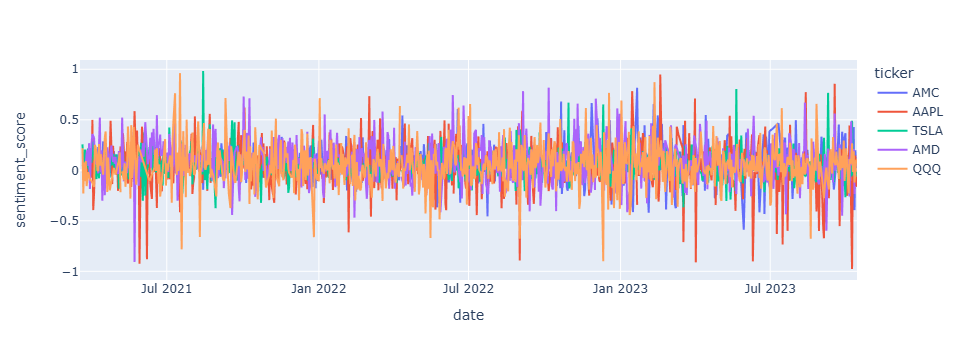

In [198]:
fig = px.line(temp.loc[temp.ticker.isin(['TSLA', 'AAPL', 'AMC', 'QQQ', 'AMD'])], x="date", y="sentiment_score", color='ticker')
fig.show()

In [246]:
temp.loc[~pd.isna(temp.sentiment)].head(10)

,no_of_comments,sentiment,sentiment_score,ticker,date
150,526,Bullish,0.130,GME,2021-03-21
151,249,Bullish,0.159,AMC,2021-03-21
152,65,Bullish,0.227,EV,2021-03-21
153,55,Bullish,0.220,PLTR,2021-03-21
154,44,Bullish,0.257,TSLA,2021-03-21
155,40,Bullish,0.178,RKT,2021-03-21
156,30,Bullish,0.151,TA,2021-03-21
157,27,Bullish,0.167,UWMC,2021-03-21
158,23,Bullish,0.210,RIDE,2021-03-21
159,16,Bullish,0.133,TD,2021-03-21


In [244]:
temp.sentiment.unique()

array([None, 'Bullish', 'Bearish'], dtype=object)

In [196]:
temp.ticker.value_counts()

ticker
TSLA    937
AAPL    857
AMC     838
QQQ     824
AMD     799
       ... 
TMO       1
CAHC      1
LTHM      1
ESTA      1
AKRO      1
Name: count, Length: 1450, dtype: int64

In [239]:
reddit = temp.copy()

In [240]:
reddit.to_csv('reddit_wallstreetbets_2020_2023.csv')